<a href="https://colab.research.google.com/github/gillis42/CSC_CSV/blob/main/CSC_J2_Orbital_Radiation_Visual_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tool to visualize trends is orbital radiation at different altitudes and inclinations**
 
The total radiation levels experienced by electronics in different orbits varies substantially based on the altitude and inclination. It can be difficult to determine how a part, or board, designed for one application will fare in a different orbit. Results from several thousand orbital radiation simulations were used to plot heatmaps of altitude vs inclination with colour indicating radiation survivability. This should serve as a visual guide to show how application radiation levels, shielding levels and lifetimes will change at different orbits between Low Earth Orbit (LEO) and Geo-stationary Orbit (GEO).
 
---

 
# Background on orbital radiation simulation methods
 
The data presented here are based on OMERE orbital radiation simulations. Orbits were simulated between 300 km and 38,000 km in 100 km steps, and at inclinations between equatorial and sun-synchronous orbit (0 and 90 degrees) in 10 degree steps. All orbits are circular. 
 
The radiation simulation models used, the following models and inputs:
 
*   Orbit generation:
  *   Number of orbits per simulation: 400
  *   Number of sample points per orbit: 100
  *   Duration: 5 years 
*   Radiation models to calculated TID:
  *   Trapped proton and electron fluxes: AP-8 (Solar Min), AE-8 (Solar Max)
  *   Solar particle average flux: ESP, 90% Confidence
      *   90% of the time this model will overestimate the total dose from solar particles
  *   Shielding calculations: ShieldDose-2, Silicon at the center of aluminium sphere
 
Results from all simulations were collated and stored as a single csv file for fast sampling and plotting. Results are stored as a single row for each altitude and inclination with columns for the Total Ionizing Dose (TID) at shileiding thicknesses between 0.1 and 100 mm of aluminium.
 

---



# User input guide 
 
This tool takes three parameters, two parameters must be fixed and one is left as a variable (set the value to 0):
*  **shield_thickness_mmAl**
  *   The equivalent aluminium thickness of the shielding used for your application (eg. you have a pre-designed 3 mm of shielding)
  *   **Variable:** If selected as the varied parameter then, for a given radiation tolerance and target lifetime, the minimum amount of shielding will be calculated for each orbit
      *  For the purpose of making plots readable, shielding values over 99 mm are set to 99 mm)
      *  The colour scale is between 0 and 15 mm, everything over 15 mm is black and considered unrealistic
*  **min_TID_kRad**
  *   The minimum dose a board can survive (eg. the weakest part is 25 kRad)
  *   **Variable:**  If selected as the varied parameter then, for a given shielding thickness and target lifetime, the minimum survival TID will be calculated for each orbit
      *  For the purpose of making plots readable, doses over 999 kRad are set to 999 kRad
      *  The colour scale is between 0 and 100 kRad, everything over 100 kRad mm is black as few parts are capable of doses of 100 kRad
*  **time_on_orbit_years**
  *   The target mission duration (eg. 15 years on orbit)
  *   **Variable:**  If selected as the varied parameter then, for a given shielding thickness and radiation tolerance, the total survival time will be calculated for each orbit
      *  For the purpose of making plots readable, lifetimes over 99 years are set to 99
      *  The colour scale is between 0 and 15 years, everything over 15 mm is white as few missions require lifetimes over 15 years

# Understanding the output

Heatmaps are produced which plot the variable, discussed above, for all orbits. Orbits are represented on the figures as increasing altitude along the x-axis, increasing inclinations along the y-axis, and the heatmap scale is the variable parameter.

Three graph are produced:
1.  Small summary plot with two sub-plots for LEO and MEO - GEO orbits (note: the altitude scale is different for both plots to adequately dispay LEO which is a smaller range of altitudes)
2. Detailed LEO plot - Including annotated heatmap values
3. Detailed MEO - GEO plot

![alt text](https://i.imgur.com/RFVZZYd.png)

# Limitations
 
This tool does not consider non-circular orbits or transfer orbits such as GEO transfer. 
 
Some insight can be gained on GEO transfer orbits based on the severe radiation conditions between LEO and GEO. This indicates that transfer time is critical to ensuring survival of electronics moving from LEO to GEO orbits. 


# Disclaimer
 
This tool is designed to visually show trends and serve as an education tool for people less familiar with radiation on orbit. It should not replace detailed radiation analysis.


---


# **Quick start**

1.   Define two parameters, leave one as a variable (set to '0') 
2.   Run the cell (play icon on left hand side)

Recommended input ranges: 

*   shield_thickness_mmAl: 3 - 5 mm
*   min_TID_kRad: 25 - 100 kRad 
*   time_on_orbit_years: 5 - 15 years


*(code needs cleaning up)*

Calculating the maximum lifetime for different orbits
Single page plot for reports (everything over 15 years is set to white as few missions require over 15 years):
Whole page landscape detailed prints:
LEO (if life is greater than 99 years the value is set to 99 years to make plot readable):
MSP


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

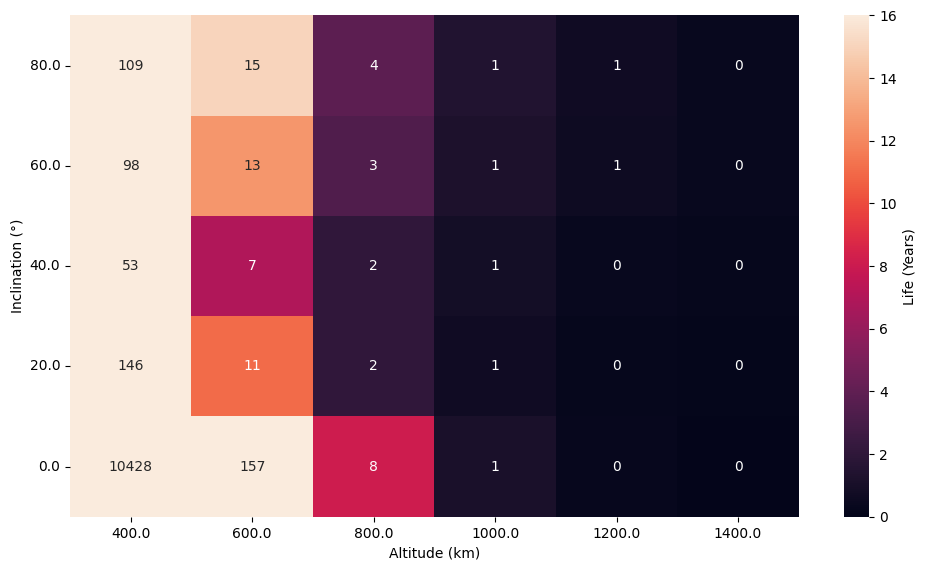

Single page plot for reports (everything over 15 years is set to white as few missions require over 15 years):
Al


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

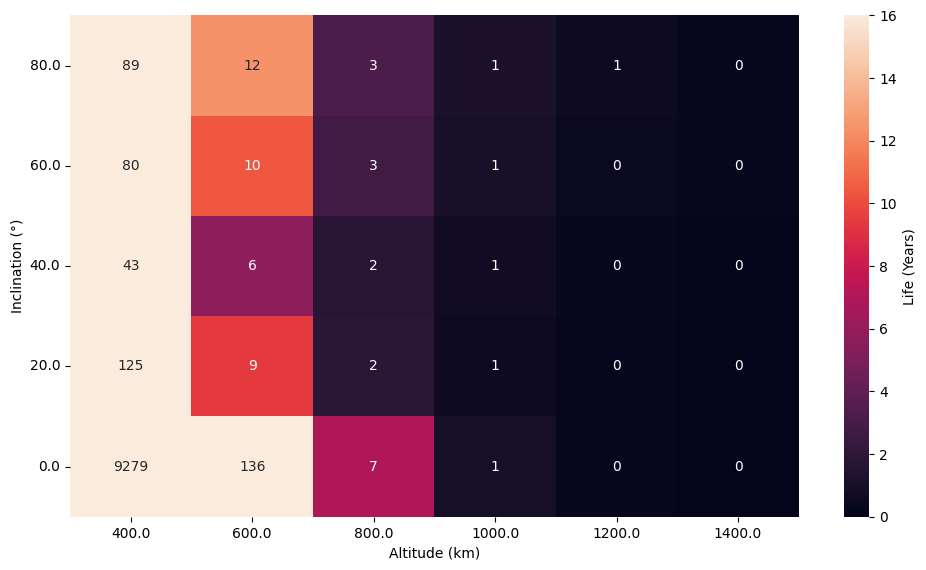

   Altitude_km  Inclination_deg        1_mmAl
0        400.0              0.0  10427.528676
1        400.0             20.0    146.484375
2        400.0             40.0     52.585451
3        400.0             60.0     97.560976
4        400.0             80.0    108.932462
   Altitude_km  Inclination_deg       1_mmAl
0        400.0              0.0  9279.307145
1        400.0             20.0   125.365650
2        400.0             40.0    42.631803
3        400.0             60.0    79.978672
4        400.0             80.0    89.179548
    Altitude_km  Inclination_deg     1_mmAl
0         400.0              0.0  12.374001
1         400.0             20.0  16.845703
2         400.0             40.0  23.347940
3         400.0             60.0  21.983740
4         400.0             80.0  22.149601
5         600.0              0.0  15.767417
6         600.0             20.0  17.046289
7         600.0             40.0  21.759259
8         600.0             60.0  21.285476
9         600.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

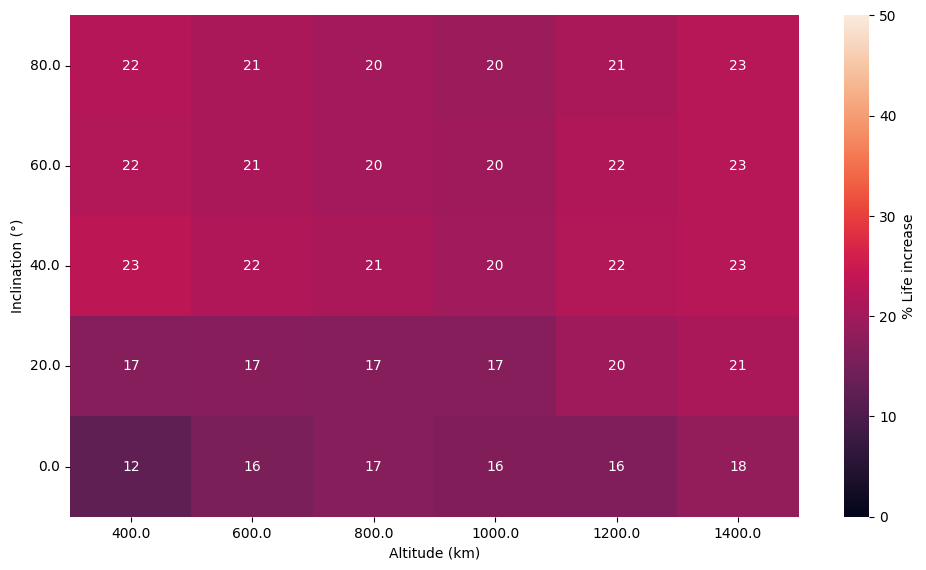

In [67]:
import sys
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

#@title Define two parameters, leave one as a variable (set to '0')  { display-mode: "form" } { run: "auto" }
shield_thickness_mmAl = "1_mmAl" #@param ["0", '0.2_mmAl', '0.4_mmAl', '0.6_mmAl', '0.8_mmAl', '1_mmAl', '1.25_mmAl', '1.5_mmAl', '1.75_mmAl', '2_mmAl', '2.5_mmAl', '3_mmAl', '4_mmAl', '5_mmAl', '6_mmAl']
min_TID_kRad =  3#@param {type:"number"}
time_on_orbit_years =  0#@param {type:"number"}

# drive.mount('/content/gdrive')
# %cd "/content/gdrive/My Drive/Colab Notebooks/2_SWARM/20200511 - Post process multi-mission files/"
# %cd "2020-05-12_inc"
csv_url_al = '''https://raw.githubusercontent.com/gillis42/CSC_CSV/9060193801724cc9bfe25c9ab74b68f074c65957/RAW_Radiation_Data_LEO%20-%20Al%20LEO.csv'''
csv_url_msp = '''https://raw.githubusercontent.com/gillis42/CSC_CSV/main/RAW_Radiation_Data_LEO%20-%20MSP%20LEO.csv'''
# !ls -lrt

# df = pd.read_csv(csv_url, delimiter=',')
# df = pd.read_csv(csv_url, delimiter=',')
# df = df.drop('Unnamed: 0', 1)

#
# ---------------------------------------------------------------------
# ----------------- If statements based on what the user inputs are
# ---------------------------------------------------------------------
#

if shield_thickness_mmAl == "0" and min_TID_kRad != 0 and time_on_orbit_years != 0:
  print('Calculating the required shielding thickensses for different orbits:')

  # Read in files 
  df_msp = pd.read_csv(csv_url_msp, delimiter=',')
  # df = df.drop('Unnamed: 0', 1)

  # Convert to krad per year (currently 1 year orbit)
  df_msp.loc[:,"0.2_mmAl":"6_mmAl"] = df_msp.loc[:,"0.2_mmAl":"6_mmAl"] / 1.

  # Convert to mGy to kRad
  df_msp.loc[:,"0.2_mmAl":"6_mmAl"] = df_msp.loc[:,"0.2_mmAl":"6_mmAl"] * (0.1 / 1000.)

  # Calculate the annual TID expereiced
  tid_per_year = min_TID_kRad / time_on_orbit_years

  # Convert columnst to strings (to prevent the next section overwriting them)
  df_shield_msp = df_msp
  df_shield_msp['Altitude_km'] = df_shield_msp['Altitude_km'].astype(str)
  df_shield_msp['Inclination_deg'] =   df_shield_msp['Inclination_deg'].astype(str)

  # Boolean operator, highlight values that are greater than the annual TID
  filter_tid =  df_shield_msp.loc[:,"0.2_mmAl":"6_mmAl"] > tid_per_year
  
  # Use boolean - Remove values that are greater than the annual TID
  df_shield_msp[filter_tid] = np.nan

  # find the minimum shielding value required to meet annual TID
  min_value = df_shield_msp.min(axis=1, skipna=True)

  # For each row / altitude, return the index of first col that isn't null 
  # THis returns the min shielding required in a series
  min_col = df_shield_msp.loc[:,"0.2_mmAl":"6_mmAl"].idxmax(axis=1, skipna=True)

  # Append the min shielding values for each altitude to new column as float
  df_shield_msp["mmAl"] = min_col.str[:-5].astype(float)

  # Get rid of other cols
  shield_required_msp = df_shield_msp.loc[:,["Altitude_km", "Inclination_deg", "mmAl"]]

  # Prep for plot, replace nan with 101 and anything over 99mm as 99mm
  shield_required_msp = shield_required_msp.replace(np.NaN,101.0)
  # shield_required_msp.loc[shield_required_msp['mmAl']  >= 99, 'mmAl'] = 99


  shield_required_msp['Altitude_km'] =   shield_required_msp['Altitude_km'].astype(float)#.astype(int)
  shield_required_msp['Inclination_deg'] =   shield_required_msp['Inclination_deg'].astype(float)#.astype(int)

  #
  # ------------------------------------ Pretty plot not useful
  #

  # print('Pretty plot not useful:')
  # pivotted = pd.pivot_table(data=shield_required,
  #                     index='Inclination_deg',
  #                     values='mmAl',
  #                     columns='Altitude_km')

  # fig, ax = plt.subplots()

  # plt.rcParams['figure.figsize'] = (10.0, 5.0)
  # plt.rcParams['font.family'] = "serif"

  # ax = sns.heatmap(pivotted, vmin=0, vmax=10)#, annot=True)
  # plt.show()
  
  
  #
  # ----------------------------------PLOTS FOR REPORTS 
  #
  plt.rcParams['font.family'] = "Sans-serif"
  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)

  # NOT USED
  # --------------
  # --------------
  # --------------
  # --------------
  # --------------
  # --------------
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  shield_required_plot_1_msp = shield_required_msp[(shield_required_msp['Inclination_deg'] < 91) & 
                                 (shield_required_msp['Altitude_km'] < 1401)]
  # shield_required_plot_2 = shield_required[(shield_required['Inclination_deg'] < 91) & 
  #                                (shield_required['Altitude_km'] > 1999)]

  # # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_msp = pd.pivot_table(data=shield_required_plot_1_msp,
                      index='Inclination_deg',
                      values='mmAl',
                      columns='Altitude_km')
  # pivotted_plot_1 = pivotted_plot_1.sort_values(by='Inclination_deg', 
  #                                               ascending=False)
  # pivotted_plot_2 = pd.pivot_table(data=shield_required_plot_2,
  #                     index='Inclination_deg',
  #                     values='mmAl',
  #                     columns='Altitude_km')
  # pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg', 
  #                                               ascending=False)

  # # 
  # # ---------- Start subplots for reports
  # #

  # print('Small, single page plot for reports (everything over 15 mm is set to black and is considered unrealistic):')
  # f, axes = plt.subplots(1, 2)#, figsize=(10, 10))

  # sns.heatmap(pivotted_plot_1, cmap='rocket_r',# center=5,
  #                       vmin=0, vmax=16, ax=axes[0],
  #                       annot=False, fmt=".0f", cbar=None)
  # sns.heatmap(pivotted_plot_2, cmap='rocket_r',# center=5,
  #                       vmin=0, vmax=16, ax=axes[1],
  #                       annot=False, fmt=".0f",
  #                       cbar_kws={'label': 'Shielding (mm Al)'})

  # # Make Y labels horizontal
  # for tick in axes[0].get_yticklabels():
  #     tick.set_rotation(0)
      
  # # Make X labels readable
  # for tick in axes[0].get_xticklabels():
  #     tick.set_rotation(60)
  # for tick in axes[1].get_xticklabels():
  #     tick.set_rotation(60)
  
  # # Axis labels 
  # axes[0].set_xlabel('Altitude (km)')
  # axes[1].set_xlabel('Altitude (km)')
  # axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
  # axes[1].set_ylabel('')
  # axes[1].yaxis.set_visible(False)
  # axes[0].title.set_text('LEO')
  # axes[1].title.set_text('MEO - GEO')

  # # Tight fit, sizw and plot
  # f.tight_layout(rect=[0, 0, .9, 1])
  # f.set_size_inches(12, 6)

  # # file_name = ('Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  # #                                       str(min_TID_kRad)))
  # # plt.savefig(file_name, dpi=100)
  # # files.download(file_name)
  # plt.show()


  #
  # ------------------------------------------- PLOTS FOR REPORTS 
  #



  #
  # -------- LEO
  #          

  print('Whole page landscape detailed prints:')
  print('LEO (if required sielding is over 99 mmm, value is set to 99 mm to make plot readable):')
  print('MSP MATERIAL')
             
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_msp, cmap='rocket_r',# center=5,
                        vmin=0, vmax=16,
                        annot=True, annot_kws={'size':10}, fmt=".1f",
                        cbar_kws={'label': 'Shielding (mm Al)'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)

  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  # file_name = ('LEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  #                                           str(min_TID_kRad)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  plt.show()

  #
  # -------- MEO
  #          
  # print('MEO - GEO:')
   
  # fig, ax = plt.subplots()
  # # plt.rcParams['font.family'] = "serif"

  # ax = sns.heatmap(pivotted_plot_2, cmap='rocket_r',# center=5,
  #                       vmin=0, vmax=16,
  #                       annot=False, annot_kws={'size':10}, fmt=".1f",
  #                       cbar_kws={'label': 'Shielding (mm Al)'})
  
  # for tick in ax.get_yticklabels():
  #     tick.set_rotation(0)
  # for tick in ax.get_xticklabels():
  #     tick.set_rotation(60)
  
  # fig.tight_layout(rect=[0, 0, .9, 1])
  # fig.set_size_inches(12, 6)
  # plt.xlabel('Altitude (km)')
  # plt.ylabel('Inclination (\N{DEGREE SIGN})')
  # # file_name = ('MEO_to_GEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  # #                                                  str(min_TID_kRad)))
  # # plt.savefig(file_name, dpi=100)
  # # files.download(file_name)
  # plt.show()


  # Read in files 
  df_al = pd.read_csv(csv_url_al, delimiter=',')
  # df = df.drop('Unnamed: 0', 1)

  # Convert to krad per year (currently 1 year orbit)
  df_al.loc[:,"0.2_mmAl":"6_mmAl"] = df_al.loc[:,"0.2_mmAl":"6_mmAl"] / 1.

  # Convert to mGy to kRad
  df_al.loc[:,"0.2_mmAl":"6_mmAl"] = df_al.loc[:,"0.2_mmAl":"6_mmAl"] * (0.1 / 1000.)

  # Calculate the annual TID expereiced
  tid_per_year = min_TID_kRad / time_on_orbit_years

  # Convert columnst to strings (to prevent the next section overwriting them)
  df_shield_al = df_al
  df_shield_al['Altitude_km'] = df_shield_al['Altitude_km'].astype(str)
  df_shield_al['Inclination_deg'] =   df_shield_al['Inclination_deg'].astype(str)

  # Boolean operator, highlight values that are greater than the annual TID
  filter_tid =  df_shield_al.loc[:,"0.2_mmAl":"6_mmAl"] > tid_per_year
  
  # Use boolean - Remove values that are greater than the annual TID
  df_shield_al[filter_tid] = np.nan

  # find the minimum shielding value required to meet annual TID
  min_value = df_shield_al.min(axis=1, skipna=True)

  # For each row / altitude, return the index of first col that isn't null 
  # THis returns the min shielding required in a series
  min_col = df_shield_al.loc[:,"0.2_mmAl":"6_mmAl"].idxmax(axis=1, skipna=True)

  # Append the min shielding values for each altitude to new column as float
  df_shield_al["mmAl"] = min_col.str[:-5].astype(float)

  # Get rid of other cols
  shield_required_al = df_shield_al.loc[:,["Altitude_km", "Inclination_deg", "mmAl"]]

  # Prep for plot, replace nan with 101 and anything over 99mm as 99mm
  shield_required_al = shield_required_al.replace(np.NaN,101.0)
  # shield_required_al.loc[shield_required_al['mmAl']  >= 99, 'mmAl'] = 99


  shield_required_al['Altitude_km'] =   shield_required_al['Altitude_km'].astype(float)#.astype(int)
  shield_required_al['Inclination_deg'] =   shield_required_al['Inclination_deg'].astype(float)#.astype(int)

  #
  # ------------------------------------ Pretty plot not useful
  #

  # print('Pretty plot not useful:')
  # pivotted = pd.pivot_table(data=shield_required,
  #                     index='Inclination_deg',
  #                     values='mmAl',
  #                     columns='Altitude_km')

  # fig, ax = plt.subplots()

  # plt.rcParams['figure.figsize'] = (10.0, 5.0)
  # plt.rcParams['font.family'] = "serif"

  # ax = sns.heatmap(pivotted, vmin=0, vmax=10)#, annot=True)
  # plt.show()
  
  
  #
  # ----------------------------------PLOTS FOR REPORTS 
  #
  plt.rcParams['font.family'] = "Sans-serif"
  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)

  # NOT USED
  # --------------
  # --------------
  # --------------
  # --------------
  # --------------
  # --------------
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  shield_required_plot_1_al = shield_required_al[(shield_required_al['Inclination_deg'] < 91) & 
                                 (shield_required_al['Altitude_km'] < 1401)]
  # shield_required_plot_2 = shield_required[(shield_required['Inclination_deg'] < 91) & 
  #                                (shield_required['Altitude_km'] > 1999)]

  # # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_al = pd.pivot_table(data=shield_required_plot_1_al,
                      index='Inclination_deg',
                      values='mmAl',
                      columns='Altitude_km')
  # pivotted_plot_1 = pivotted_plot_1.sort_values(by='Inclination_deg', 
  #                                               ascending=False)
  # pivotted_plot_2 = pd.pivot_table(data=shield_required_plot_2,
  #                     index='Inclination_deg',
  #                     values='mmAl',
  #                     columns='Altitude_km')
  # pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg', 
  #                                               ascending=False)

  # # 
  # # ---------- Start subplots for reports
  # #

  # print('Small, single page plot for reports (everything over 15 mm is set to black and is considered unrealistic):')
  # f, axes = plt.subplots(1, 2)#, figsize=(10, 10))

  # sns.heatmap(pivotted_plot_1, cmap='rocket_r',# center=5,
  #                       vmin=0, vmax=16, ax=axes[0],
  #                       annot=False, fmt=".0f", cbar=None)
  # sns.heatmap(pivotted_plot_2, cmap='rocket_r',# center=5,
  #                       vmin=0, vmax=16, ax=axes[1],
  #                       annot=False, fmt=".0f",
  #                       cbar_kws={'label': 'Shielding (mm Al)'})

  # # Make Y labels horizontal
  # for tick in axes[0].get_yticklabels():
  #     tick.set_rotation(0)
      
  # # Make X labels readable
  # for tick in axes[0].get_xticklabels():
  #     tick.set_rotation(60)
  # for tick in axes[1].get_xticklabels():
  #     tick.set_rotation(60)
  
  # # Axis labels 
  # axes[0].set_xlabel('Altitude (km)')
  # axes[1].set_xlabel('Altitude (km)')
  # axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
  # axes[1].set_ylabel('')
  # axes[1].yaxis.set_visible(False)
  # axes[0].title.set_text('LEO')
  # axes[1].title.set_text('MEO - GEO')

  # # Tight fit, sizw and plot
  # f.tight_layout(rect=[0, 0, .9, 1])
  # f.set_size_inches(12, 6)

  # # file_name = ('Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  # #                                       str(min_TID_kRad)))
  # # plt.savefig(file_name, dpi=100)
  # # files.download(file_name)
  # plt.show()


  #
  # ------------------------------------------- PLOTS FOR REPORTS 
  #



  #
  # -------- LEO
  #          
  print('Al MATERIAL')
             
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_al, cmap='rocket_r',# center=5,
                        vmin=0, vmax=16,
                        annot=True, annot_kws={'size':10}, fmt=".1f",
                        cbar_kws={'label': 'Shielding (mm Al)'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)

  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  # file_name = ('LEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  #                                           str(min_TID_kRad)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  plt.show()

  #
  # -------- MEO
  #          
  # print('MEO - GEO:')
   
  # fig, ax = plt.subplots()
  # # plt.rcParams['font.family'] = "serif"

  # ax = sns.heatmap(pivotted_plot_2, cmap='rocket_r',# center=5,
  #                       vmin=0, vmax=16,
  #                       annot=False, annot_kws={'size':10}, fmt=".1f",
  #                       cbar_kws={'label': 'Shielding (mm Al)'})
  
  # for tick in ax.get_yticklabels():
  #     tick.set_rotation(0)
  # for tick in ax.get_xticklabels():
  #     tick.set_rotation(60)
  
  # fig.tight_layout(rect=[0, 0, .9, 1])
  # fig.set_size_inches(12, 6)
  # plt.xlabel('Altitude (km)')
  # plt.ylabel('Inclination (\N{DEGREE SIGN})')
  # # file_name = ('MEO_to_GEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  # #                                                  str(min_TID_kRad)))
  # # plt.savefig(file_name, dpi=100)
  # # files.download(file_name)
  # plt.show()
  shield_required_results = pd.DataFrame()
  shield_required_results['Altitude_km'] = shield_required_al['Altitude_km']
  shield_required_results['Inclination_deg'] = shield_required_al['Inclination_deg']
  shield_required_results['mmAl'] = 100 * (1.0 - (shield_required_msp['mmAl'] / shield_required_al['mmAl']))

  print(shield_required_results.head(20))

  shield_required_plot_1_re = shield_required_results[(shield_required_results['Inclination_deg'] < 91) & 
                                 (shield_required_results['Altitude_km'] < 1401)]

  pivotted_plot_1_re = pd.pivot_table(data=shield_required_plot_1_re,
                      index='Inclination_deg',
                      values='mmAl',
                      columns='Altitude_km')
             
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_re, cmap='rocket_r',# center=5,
                        vmin=0, vmax=50,
                        annot=True, annot_kws={'size':10}, fmt=".1f",
                        cbar_kws={'label': '% reduction in shielding mass'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)

  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')
  plt.show()



elif min_TID_kRad == 0 and shield_thickness_mmAl != "0" and time_on_orbit_years != 0:
  print('Calculating the maximum dose for different orbits')

  # Read in file
  df_msp = pd.read_csv(csv_url_msp, delimiter=',')
  # df = df.drop('Unnamed: 0', 1)
  

  # Select alt, inc and approrpate shielded dose colums
  shielded_dose_msp = df_msp.loc[:,["Altitude_km", "Inclination_deg", 
                            shield_thickness_mmAl]]

  # convert to kRad for life mGy conversion included
  shielded_dose_msp[shield_thickness_mmAl] = shielded_dose_msp[shield_thickness_mmAl] * (time_on_orbit_years / (1.)) * (0.1 / 1000.)
  
  # Prep for plot -> Make all values ints
  shielded_dose_msp['Altitude_km'] = shielded_dose_msp['Altitude_km'].astype(float)#.astype(int)
  shielded_dose_msp['Inclination_deg'] = shielded_dose_msp['Inclination_deg'].astype(float)#.astype(int)
  shielded_dose_msp[shield_thickness_mmAl] = shielded_dose_msp[shield_thickness_mmAl].astype(float)#.astype(int)
  
  # To prevent heat map truncation, make everything over 999 = 999
  # shielded_dose_msp.loc[shielded_dose_msp[shield_thickness_mmAl]  >= 999, 
  #                shield_thickness_mmAl] = 999


  #
  # ------------------------------------------- Pretty plot
  #

  # print('Pretty plot but not all that useful')

  # fig, ax = plt.subplots()
  # pivotted_plot = pd.pivot_table(data=shielded_dose,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # ax = sns.heatmap(pivotted_plot, vmin=0, vmax=101)
  # plt.show()
  
 
  #
  # ------------------------------------------- PLOTS FOR REPORTS 
  # 

  print('Single page plot for reports (everything over 100 kRad is set to black):')
  print('MSP')
  plt.rcParams['font.family'] = "Sans-serif"


  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  shielded_dose_plot_1_msp = shielded_dose_msp[(shielded_dose_msp['Inclination_deg'] < 91) & (shielded_dose_msp['Altitude_km'] < 1401)]
  # shielded_dose_plot_2 = shielded_dose[(shielded_dose['Inclination_deg'] < 
  #                             91) & (shielded_dose['Altitude_km'] > 1999)]




  # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_msp = pd.pivot_table(data=shielded_dose_plot_1_msp,
                      index='Inclination_deg',
                      values=shield_thickness_mmAl,
                      columns='Altitude_km')
  pivotted_plot_1_msp = pivotted_plot_1_msp.sort_values(by='Inclination_deg', 
                                                ascending=False)
  # pivotted_plot_2 = pd.pivot_table(data=shielded_dose_plot_2,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg', 
  #                                               ascending=False)

  # 
  # ---------- Start subplots for reports
  #
  # plt.rcParams['font.family'] = "Sans-serif"
  # f, axes = plt.subplots(1, 2)#, figsize=(10, 10))

  # sns.heatmap(pivotted_plot_1, cmap='rocket_r', # center=10, 
  #                       vmin=0, vmax=101, ax=axes[0],
  #                       annot=False, fmt=".0f", cbar=None)
  # sns.heatmap(pivotted_plot_2, cmap='rocket_r', # center=10, 
  #                       vmin=0, vmax=101, ax=axes[1],
  #                       annot=False, fmt=".0f",
  #                       cbar_kws={'label': 'Minimum survival TID (kRad)'})

  # # Make Y labels horizontal
  # for tick in axes[0].get_yticklabels():
  #     tick.set_rotation(0)
      
  # # Make X labels readable
  # for tick in axes[0].get_xticklabels():
  #     tick.set_rotation(60)
  # for tick in axes[1].get_xticklabels():
  #     tick.set_rotation(60)
  
  # # Axis labels 
  # axes[0].set_xlabel('Altitude (km)')
  # axes[1].set_xlabel('Altitude (km)')
  # axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
  # axes[1].set_ylabel('')
  # axes[1].yaxis.set_visible(False)
  # axes[0].title.set_text('LEO')
  # axes[1].title.set_text('MEO - GEO')

  # # Tight fit, sizw and plot
  # f.tight_layout(rect=[0, 0, .9, 1])
  # f.set_size_inches(12, 6)

  # file_name = ('TID_%s_%s_years.png' % (shield_thickness_mmAl, 
  #                                       str(time_on_orbit_years)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()


  #
  # -------- LEO
  #          

  # print('This wont work very well')
  print('LEO (all doses over 999 kRad set to 999 kRad to make plot readable):')
  print("MSP")
             
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_msp, cmap='rocket_r', # center=10, 
                        vmin=0, vmax=101,
                        annot=True, annot_kws={'size':10}, fmt=".0f",
                        cbar_kws={'label': 'Minimum survival TID (kRad)'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)  
  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  file_name = ('LEO_TID_%s_%s_years.png' % (shield_thickness_mmAl, 
                                        str(time_on_orbit_years)))
  plt.savefig(file_name, dpi=100)
  files.download(file_name)
  plt.show()

  #
  # -------- MEO
  #          
  # print('MEO - GEO:')
  # fig, ax = plt.subplots()

  # ax = sns.heatmap(pivotted_plot_2, cmap='rocket_r', # center=10, 
  #                       vmin=0, vmax=101,
  #                       annot=False, annot_kws={'size':10}, fmt=".0f",
  #                       cbar_kws={'label': 'Minimum survival TID (kRad)'})
  
  # for tick in ax.get_yticklabels():
  #     tick.set_rotation(0)
  # for tick in ax.get_xticklabels():
  #     tick.set_rotation(60)
  
  # fig.tight_layout(rect=[0, 0, .9, 1])
  # fig.set_size_inches(12, 6)
  # plt.xlabel('Altitude (km)')
  # plt.ylabel('Inclination (\N{DEGREE SIGN})')
  # file_name = ('MEO_to_GEO_TID_%s_%s_years.png' % (shield_thickness_mmAl, 
  #                                       str(time_on_orbit_years)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()


  # Read in file
  df_al = pd.read_csv(csv_url_al, delimiter=',')
  # df = df.drop('Unnamed: 0', 1)
  

  # Select alt, inc and approrpate shielded dose colums
  shielded_dose_al = df_al.loc[:,["Altitude_km", "Inclination_deg", 
                            shield_thickness_mmAl]]

  # convert to kRad for life mGy conversion included
  shielded_dose_al[shield_thickness_mmAl] = shielded_dose_al[shield_thickness_mmAl] * (time_on_orbit_years / (1.)) * (0.1 / 1000.)
  
  # Prep for plot -> Make all values ints
  shielded_dose_al['Altitude_km'] = shielded_dose_al['Altitude_km'].astype(float)#.astype(int)
  shielded_dose_al['Inclination_deg'] = shielded_dose_al['Inclination_deg'].astype(float)#.astype(int)
  shielded_dose_al[shield_thickness_mmAl] = shielded_dose_al[shield_thickness_mmAl].astype(float)#.astype(int)
  
  # To prevent heat map truncation, make everything over 999 = 999
  # shielded_dose_al.loc[shielded_dose_al[shield_thickness_mmAl]  >= 999, 
  #                shield_thickness_mmAl] = 999


  #
  # ------------------------------------------- Pretty plot
  #

  # print('Pretty plot but not all that useful')

  # fig, ax = plt.subplots()
  # pivotted_plot = pd.pivot_table(data=shielded_dose,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # ax = sns.heatmap(pivotted_plot, vmin=0, vmax=101)
  # plt.show()
  
 
  #
  # ------------------------------------------- PLOTS FOR REPORTS 
  # 

  print('Single page plot for reports (everything over 100 kRad is set to black):')
  plt.rcParams['font.family'] = "Sans-serif"


  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  shielded_dose_plot_1_al = shielded_dose_al[(shielded_dose_al['Inclination_deg'] < 91) & (shielded_dose_al['Altitude_km'] < 1401)]
  # shielded_dose_plot_2 = shielded_dose[(shielded_dose['Inclination_deg'] < 
  #                             91) & (shielded_dose['Altitude_km'] > 1999)]




  # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_al = pd.pivot_table(data=shielded_dose_plot_1_al,
                      index='Inclination_deg',
                      values=shield_thickness_mmAl,
                      columns='Altitude_km')
  pivotted_plot_1_al = pivotted_plot_1_al.sort_values(by='Inclination_deg', 
                                                ascending=False)
  # pivotted_plot_2 = pd.pivot_table(data=shielded_dose_plot_2,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg', 
  #                                               ascending=False)

  # 
  # ---------- Start subplots for reports
  #
  # plt.rcParams['font.family'] = "Sans-serif"
  # f, axes = plt.subplots(1, 2)#, figsize=(10, 10))

  # sns.heatmap(pivotted_plot_1, cmap='rocket_r', # center=10, 
  #                       vmin=0, vmax=101, ax=axes[0],
  #                       annot=False, fmt=".0f", cbar=None)
  # sns.heatmap(pivotted_plot_2, cmap='rocket_r', # center=10, 
  #                       vmin=0, vmax=101, ax=axes[1],
  #                       annot=False, fmt=".0f",
  #                       cbar_kws={'label': 'Minimum survival TID (kRad)'})

  # # Make Y labels horizontal
  # for tick in axes[0].get_yticklabels():
  #     tick.set_rotation(0)
      
  # # Make X labels readable
  # for tick in axes[0].get_xticklabels():
  #     tick.set_rotation(60)
  # for tick in axes[1].get_xticklabels():
  #     tick.set_rotation(60)
  
  # # Axis labels 
  # axes[0].set_xlabel('Altitude (km)')
  # axes[1].set_xlabel('Altitude (km)')
  # axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
  # axes[1].set_ylabel('')
  # axes[1].yaxis.set_visible(False)
  # axes[0].title.set_text('LEO')
  # axes[1].title.set_text('MEO - GEO')

  # # Tight fit, sizw and plot
  # f.tight_layout(rect=[0, 0, .9, 1])
  # f.set_size_inches(12, 6)

  # file_name = ('TID_%s_%s_years.png' % (shield_thickness_mmAl, 
  #                                       str(time_on_orbit_years)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()


  #
  # -------- LEO
  #          

  # print('This wont work very well')
  print('Al')
             
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_al, cmap='rocket_r', # center=10, 
                        vmin=0, vmax=101,
                        annot=True, annot_kws={'size':10}, fmt=".0f",
                        cbar_kws={'label': 'Minimum survival TID (kRad)'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)  
  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  file_name = ('LEO_TID_%s_%s_years.png' % (shield_thickness_mmAl, 
                                        str(time_on_orbit_years)))
  plt.savefig(file_name, dpi=100)
  files.download(file_name)
  plt.show()

  #
  # -------- MEO
  #          
  # print('MEO - GEO:')
  # fig, ax = plt.subplots()

  # ax = sns.heatmap(pivotted_plot_2, cmap='rocket_r', # center=10, 
  #                       vmin=0, vmax=101,
  #                       annot=False, annot_kws={'size':10}, fmt=".0f",
  #                       cbar_kws={'label': 'Minimum survival TID (kRad)'})
  
  # for tick in ax.get_yticklabels():
  #     tick.set_rotation(0)
  # for tick in ax.get_xticklabels():
  #     tick.set_rotation(60)
  
  # fig.tight_layout(rect=[0, 0, .9, 1])
  # fig.set_size_inches(12, 6)
  # plt.xlabel('Altitude (km)')
  # plt.ylabel('Inclination (\N{DEGREE SIGN})')
  # file_name = ('MEO_to_GEO_TID_%s_%s_years.png' % (shield_thickness_mmAl, 
  #                                       str(time_on_orbit_years)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()  print(life_years_plot_1_msp.head())
  shielded_dose_results = pd.DataFrame()
  shielded_dose_results['Altitude_km'] = shielded_dose_al['Altitude_km']
  shielded_dose_results['Inclination_deg'] = shielded_dose_al['Inclination_deg']
  shielded_dose_results[shield_thickness_mmAl] = 100 * (1.0 - (shielded_dose_msp[shield_thickness_mmAl] / shielded_dose_al[shield_thickness_mmAl]))

  print(shielded_dose_results.head(20))



  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  shielded_dose_plot_1_re= shielded_dose_results[(shielded_dose_results['Inclination_deg'] < 91) & (shielded_dose_results['Altitude_km'] < 1401)]
  # shielded_dose_plot_2 = shielded_dose[(shielded_dose['Inclination_deg'] < 
  #                             91) & (shielded_dose['Altitude_km'] > 1999)]




  # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_re = pd.pivot_table(data=shielded_dose_plot_1_re,
                      index='Inclination_deg',
                      values=shield_thickness_mmAl,
                      columns='Altitude_km')
  pivotted_plot_1_re = pivotted_plot_1_re.sort_values(by='Inclination_deg', 
                                                ascending=False)
             
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_re, cmap='rocket_r', # center=10, 
                        vmin=0, vmax=50,
                        annot=True, annot_kws={'size':10}, fmt=".0f",
                        cbar_kws={'label': '% TID reduction'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)  
  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  file_name = ('LEO_TID_%s_%s_years.png' % (shield_thickness_mmAl, 
                                        str(time_on_orbit_years)))
  plt.savefig(file_name, dpi=100)
  files.download(file_name)
  plt.show()


elif time_on_orbit_years == 0 and shield_thickness_mmAl != "0" and min_TID_kRad != 0 :
  print('Calculating the maximum lifetime for different orbits')

  # Read in file
  df_msp = pd.read_csv(csv_url_msp, delimiter=',')
  # df = df.drop('Unnamed: 0', 1)
  
  # Select alt, inc and approrpate shielded dose colums
  life_years_msp = df_msp.loc[:,["Altitude_km", "Inclination_deg", 
                         shield_thickness_mmAl]]

  # Work out lifetime at each orbit
  life_years_msp[shield_thickness_mmAl] = min_TID_kRad / ((0.1 / 1000.) * life_years_msp[shield_thickness_mmAl] / (1.0) )
  
  # Replace infinities with useable (but large) value
  life_years_msp = life_years_msp.replace([np.inf, -np.inf, np.nan], 10000)
  
  # Prep for plot -> Make all values ints
  life_years_msp['Altitude_km'] = life_years_msp['Altitude_km'].astype(float)#.astype(int)
  life_years_msp['Inclination_deg'] = life_years_msp['Inclination_deg'].astype(float)#.astype(int)
  life_years_msp[shield_thickness_mmAl] = life_years_msp[shield_thickness_mmAl].astype(float)#.astype(int)
  
  # To prevent heat map truncation, make everything over 99 = 99
  # life_years_msp.loc[life_years_msp[shield_thickness_mmAl]  >= 99, 
  #                shield_thickness_mmAl] = 99

  #
  # ------------------------------------------- Pretty plot
  #

  # print('Pretty plot but not all that useful')

  # fig, ax = plt.subplots()
  # pivotted_plot = pd.pivot_table(data=life_years,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # ax = sns.heatmap(pivotted_plot, vmin=10, vmax=20)
  # plt.show()

  #
  # ------------------------------------------- PLOTS FOR REPORTS 
  # 

  print('Single page plot for reports (everything over 15 years is set to white as few missions require over 15 years):')
  plt.rcParams['font.family'] = "Sans-serif"


  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  life_years_plot_1_msp = life_years_msp[(life_years_msp['Inclination_deg'] < 91) & 
                                 (life_years_msp['Altitude_km'] < 1401)]
  # life_years_plot_2 = life_years[(life_years['Inclination_deg'] < 91) & 
  #                                (life_years['Altitude_km'] > 1999)]

  # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_msp = pd.pivot_table(data=life_years_plot_1_msp,
                      index='Inclination_deg',
                      values=shield_thickness_mmAl,
                      columns='Altitude_km')
  pivotted_plot_1_msp = pivotted_plot_1_msp.sort_values(by='Inclination_deg', 
                                                ascending=False)
  # pivotted_plot_2 = pd.pivot_table(data=life_years_plot_2,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg', 
  #                                               ascending=False)

  # 
  # ---------- Start subplots for reports
  #
  # plt.rcParams['font.family'] = "Sans-serif"
  # f, axes = plt.subplots(1, 2)#, figsize=(10, 10))

  # sns.heatmap(pivotted_plot_1, cmap='rocket', # center=10, 
  #                       vmin=0, vmax=16, ax=axes[0],
  #                       annot=False, fmt=".0f", cbar=None)
  # sns.heatmap(pivotted_plot_2, cmap='rocket', # center=10, 
  #                       vmin=0, vmax=16, ax=axes[1],
  #                       annot=False, fmt=".0f",
  #                       cbar_kws={'label': 'Life (Years)'})

  # # Make Y labels horizontal
  # for tick in axes[0].get_yticklabels():
  #     tick.set_rotation(0)
      
  # # Make X labels readable
  # for tick in axes[0].get_xticklabels():
  #     tick.set_rotation(60)
  # for tick in axes[1].get_xticklabels():
  #     tick.set_rotation(60)
  
  # # Axis labels 
  # axes[0].set_xlabel('Altitude (km)')
  # axes[1].set_xlabel('Altitude (km)')
  # axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
  # axes[1].set_ylabel('')
  # axes[1].yaxis.set_visible(False)
  # axes[0].title.set_text('LEO')
  # axes[1].title.set_text('MEO - GEO')

  # # Tight fit, sizw and plot
  # f.tight_layout(rect=[0, 0, .9, 1])
  # f.set_size_inches(12, 6)

  # file_name = ('Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  #                                       str(min_TID_kRad)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()

  #
  # -------- LEO
  #          

  print('Whole page landscape detailed prints:')
  print('LEO (if life is greater than 99 years the value is set to 99 years to make plot readable):')
  print('MSP')

  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_msp, cmap='rocket', # center=10, 
                        vmin=0, vmax=16,
                        annot=True, annot_kws={'size':10}, fmt=".0f",
                        cbar_kws={'label': 'Life (Years)'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)  
  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  file_name = ('LEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
                                            str(min_TID_kRad)))
  plt.savefig(file_name, dpi=100)
  files.download(file_name)
  plt.show()

  #
  # -------- MEO
  #          
  # print('MEO - GEO:')
  # fig, ax = plt.subplots()

  # ax = sns.heatmap(pivotted_plot_2, cmap='rocket', # center=10, 
  #                       vmin=0, vmax=16,
  #                       annot=False, annot_kws={'size':10}, fmt=".0f",
  #                       cbar_kws={'label': 'Life (Years)'})
  
  # for tick in ax.get_yticklabels():
  #     tick.set_rotation(0)
  # for tick in ax.get_xticklabels():
  #     tick.set_rotation(60)
  
  # fig.tight_layout(rect=[0, 0, .9, 1])
  # fig.set_size_inches(12, 6)
  # plt.xlabel('Altitude (km)')
  # plt.ylabel('Inclination (\N{DEGREE SIGN})')
  # file_name = ('MEO_to_GEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  #                                                  str(min_TID_kRad)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()


  
  # Read in file
  df_al = pd.read_csv(csv_url_al, delimiter=',')
  # df = df.drop('Unnamed: 0', 1)
  
  # Select alt, inc and approrpate shielded dose colums
  life_years_al = df_al.loc[:,["Altitude_km", "Inclination_deg", 
                         shield_thickness_mmAl]]

  # Work out lifetime at each orbit
  life_years_al[shield_thickness_mmAl] = min_TID_kRad / ((0.1 / 1000.) * life_years_al[shield_thickness_mmAl] / (1.0) )
  
  # Replace infinities with useable (but large) value
  life_years_al = life_years_al.replace([np.inf, -np.inf, np.nan], 10000)
  
  # Prep for plot -> Make all values ints
  life_years_al['Altitude_km'] = life_years_al['Altitude_km'].astype(float)#.astype(int)
  life_years_al['Inclination_deg'] = life_years_al['Inclination_deg'].astype(float)#.astype(int)
  life_years_al[shield_thickness_mmAl] = life_years_al[shield_thickness_mmAl].astype(float)#.astype(int)
  
  # To prevent heat map truncation, make everything over 99 = 99
  # life_years_al.loc[life_years_al[shield_thickness_mmAl]  >= 99, 
  #                shield_thickness_mmAl] = 99

  #
  # ------------------------------------------- Pretty plot
  #

  # print('Pretty plot but not all that useful')

  # fig, ax = plt.subplots()
  # pivotted_plot = pd.pivot_table(data=life_years,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # ax = sns.heatmap(pivotted_plot, vmin=10, vmax=20)
  # plt.show()

  #
  # ------------------------------------------- PLOTS FOR REPORTS 
  # 

  print('Single page plot for reports (everything over 15 years is set to white as few missions require over 15 years):')
  plt.rcParams['font.family'] = "Sans-serif"


  # Get rid of repeated values (90 - 180 is a mirror of 0 - 90)
  # Jorge, this is where you can change the axes, eg, I magede the first plot be under 1000 km
  life_years_plot_1_al = life_years_al[(life_years_al['Inclination_deg'] < 91) & 
                                 (life_years_al['Altitude_km'] < 1401)]
  # life_years_plot_2 = life_years[(life_years['Inclination_deg'] < 91) & 
  #                                (life_years['Altitude_km'] > 1999)]

  # Make pivot table for plts of 1) LEO, 2) MEO-GEO
  # Also sort so 0 it at bottom of graph not top
  pivotted_plot_1_al = pd.pivot_table(data=life_years_plot_1_al,
                      index='Inclination_deg',
                      values=shield_thickness_mmAl,
                      columns='Altitude_km')
  pivotted_plot_1_al = pivotted_plot_1_al.sort_values(by='Inclination_deg', 
                                                ascending=False)
  # pivotted_plot_2 = pd.pivot_table(data=life_years_plot_2,
  #                     index='Inclination_deg',
  #                     values=shield_thickness_mmAl,
  #                     columns='Altitude_km')
  # pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg', 
  #                                               ascending=False)

  # 
  # ---------- Start subplots for reports
  #
  # plt.rcParams['font.family'] = "Sans-serif"
  # f, axes = plt.subplots(1, 2)#, figsize=(10, 10))

  # sns.heatmap(pivotted_plot_1, cmap='rocket', # center=10, 
  #                       vmin=0, vmax=16, ax=axes[0],
  #                       annot=False, fmt=".0f", cbar=None)
  # sns.heatmap(pivotted_plot_2, cmap='rocket', # center=10, 
  #                       vmin=0, vmax=16, ax=axes[1],
  #                       annot=False, fmt=".0f",
  #                       cbar_kws={'label': 'Life (Years)'})

  # # Make Y labels horizontal
  # for tick in axes[0].get_yticklabels():
  #     tick.set_rotation(0)
      
  # # Make X labels readable
  # for tick in axes[0].get_xticklabels():
  #     tick.set_rotation(60)
  # for tick in axes[1].get_xticklabels():
  #     tick.set_rotation(60)
  
  # # Axis labels 
  # axes[0].set_xlabel('Altitude (km)')
  # axes[1].set_xlabel('Altitude (km)')
  # axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
  # axes[1].set_ylabel('')
  # axes[1].yaxis.set_visible(False)
  # axes[0].title.set_text('LEO')
  # axes[1].title.set_text('MEO - GEO')

  # # Tight fit, sizw and plot
  # f.tight_layout(rect=[0, 0, .9, 1])
  # f.set_size_inches(12, 6)

  # file_name = ('Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  #                                       str(min_TID_kRad)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()

  #
  # -------- LEO
  #          

  print('Al')       
  fig, ax = plt.subplots()
  # plt.rcParams['font.family'] = "serif"

  ax = sns.heatmap(pivotted_plot_1_al, cmap='rocket', # center=10, 
                        vmin=0, vmax=16,
                        annot=True, annot_kws={'size':10}, fmt=".0f",
                        cbar_kws={'label': 'Life (Years)'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)  
  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  file_name = ('LEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
                                            str(min_TID_kRad)))
  plt.savefig(file_name, dpi=100)
  files.download(file_name)
  plt.show()

  #
  # -------- MEO
  #          
  # print('MEO - GEO:')
  # fig, ax = plt.subplots()

  # ax = sns.heatmap(pivotted_plot_2, cmap='rocket', # center=10, 
  #                       vmin=0, vmax=16,
  #                       annot=False, annot_kws={'size':10}, fmt=".0f",
  #                       cbar_kws={'label': 'Life (Years)'})
  
  # for tick in ax.get_yticklabels():
  #     tick.set_rotation(0)
  # for tick in ax.get_xticklabels():
  #     tick.set_rotation(60)
  
  # fig.tight_layout(rect=[0, 0, .9, 1])
  # fig.set_size_inches(12, 6)
  # plt.xlabel('Altitude (km)')
  # plt.ylabel('Inclination (\N{DEGREE SIGN})')
  # file_name = ('MEO_to_GEO_Life_%s_%s_kRad.png' % (shield_thickness_mmAl, 
  #                                                  str(min_TID_kRad)))
  # plt.savefig(file_name, dpi=100)
  # files.download(file_name)
  # plt.show()
  print(life_years_plot_1_msp.head())
  print(life_years_plot_1_al.head())
  life_years_results = pd.DataFrame()
  life_years_results['Altitude_km'] = life_years_plot_1_msp['Altitude_km']
  life_years_results['Inclination_deg'] = life_years_plot_1_msp['Inclination_deg']
  life_years_results[shield_thickness_mmAl] = 100*((life_years_plot_1_msp[shield_thickness_mmAl] / life_years_plot_1_al[shield_thickness_mmAl]) - 1.)
  for i in range(len(life_years_results[shield_thickness_mmAl])):
    if life_years_results[shield_thickness_mmAl][i] <= 0:
        life_years_results[shield_thickness_mmAl][i] = np.nan

  print(life_years_results.head(40))

  #PLOT THE MIX

  pivotted_plot_1_re = pd.pivot_table(data=life_years_results,
                      index='Inclination_deg',
                      values=shield_thickness_mmAl,
                      columns='Altitude_km')
  pivotted_plot_1_re = pivotted_plot_1_re.sort_values(by='Inclination_deg', 
                                                ascending=False)

  fig, ax = plt.subplots()

  ax = sns.heatmap(pivotted_plot_1_re, cmap='rocket', # center=10, 
                        vmin=0, vmax=50,
                        annot=True, annot_kws={'size':10}, fmt=".0f",
                        cbar_kws={'label': '% Life increase'})
  
  for tick in ax.get_yticklabels():
      tick.set_rotation(0)  
  for tick in ax.get_xticklabels():
      tick.set_rotation(0)
  
  fig.tight_layout(rect=[0, 0, .9, 1])
  fig.set_size_inches(12, 6)
  
  plt.xlabel('Altitude (km)')
  plt.ylabel('Inclination (\N{DEGREE SIGN})')

  plt.savefig(file_name, dpi=100)
  files.download(file_name)
  plt.show()



else:
  print('Either more than one parameter is zero or no parameters are zero, this will cause a failure!')